In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [2]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b)

In [3]:
for j in range(n):
    qc_output.measure(j,j)


In [6]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

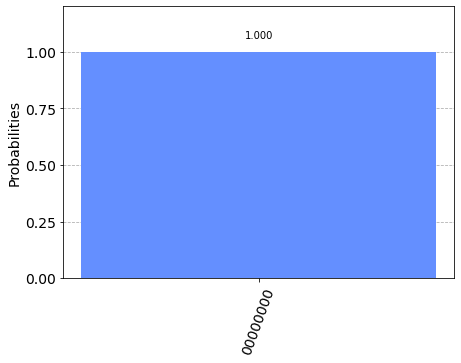

In [7]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_output)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

### Creating an Adder Circuit


In [9]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [12]:
qc = qc_encode + qc_output

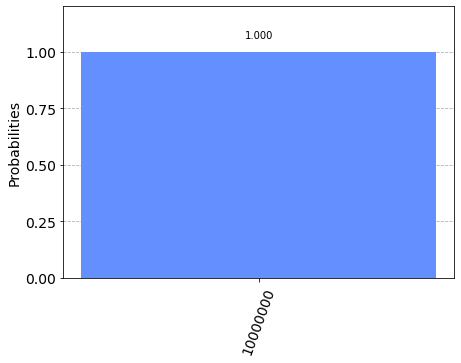

In [13]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [14]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [26]:
qc_ha = QuantumCircuit(4,2)

qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

qc_ha.ccx(0,1,3)
qc_ha.measure(2,0)
qc_ha.barrier()

qc_ha.measure(2,0)
qc_ha.measure(3,1)
qc_ha.draw()

┌───┐ ░            ░          ░       
q_0: ┤ X ├─░───■────────░───■──────░───────
     ├───┤ ░   │        ░   │      ░       
q_1: ┤ X ├─░───┼────■───░───■──────░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░   │  ┌─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░───┼──┤M├─░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐└╥┘ ░ └╥┘┌─┐
q_3: ──────░────────────░─┤ X ├─╫──░──╫─┤M├
           ░            ░ └───┘ ║  ░  ║ └╥┘
c: 2/═══════════════════════════╩═════╩══╩═
                                0     0  1

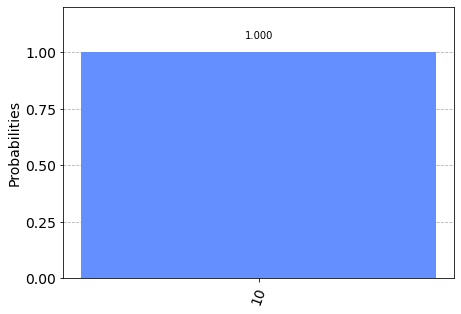

In [27]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

### Quantum Circuit - representing qubit states

In [28]:
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw()

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [29]:
svsim = Aer.get_backend('statevector_simulator')

In [31]:
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state, 0)
qobj = assemble(qc)
result = svsim.run(qobj).result()

In [33]:
out_state = result.get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


In [34]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

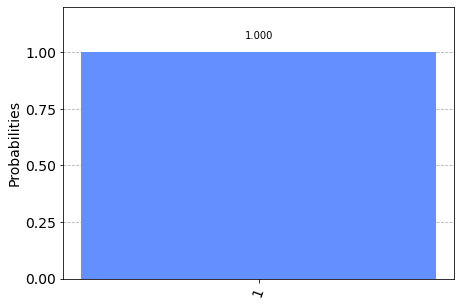

In [35]:
qobj = assemble(qc)
result = svsim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [37]:
from math import sqrt
initial_state = [1/sqrt(2), 1/sqrt(2)]

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
print(state)

[0.70710678+0.j 0.70710678+0.j]


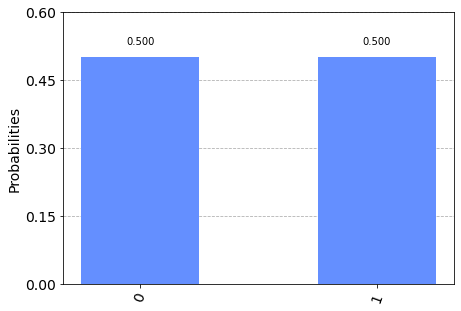

In [40]:
qobj = assemble(qc)
results = svsim.run(qobj).result().get_counts()
plot_histogram(results)

### 1/3 chance of 0

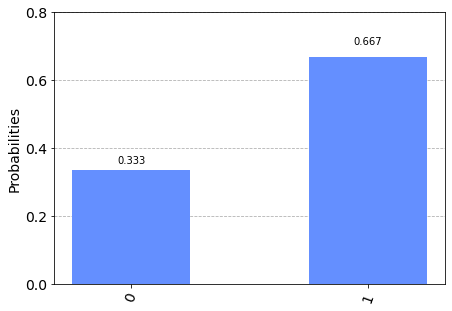

In [45]:
initial_state = [1/sqrt(3), -sqrt(2/3)]

qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qobj = assemble(qc)
results = svsim.run(qobj).result().get_counts()
plot_histogram(results)